In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
   # statsmodels : 통계 모델링, 경제학, 금융학 등에서 사용되는 통계적 모델과 테스트 방법을 제공하는 라이브러리
   # 선형 회귀, 시계열 분석, 로지스틱 회귀 분석 등 수행


In [25]:
# AirPassengers 데이터셋을  불러옴
# 1949년부터 1960년까지 매월 항공기 탑승객 수
data = sm.datasets.get_rdataset("AirPassengers").data


In [26]:
# 'time' 열을 생성(datetime 인덱스 생성)
# 시계열 데이터에 날짜 정보 추가 -> 데이터를 시간적 컨텍스트 내에서 분석 용이
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')

data

,time,value
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121
...,...,...
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390


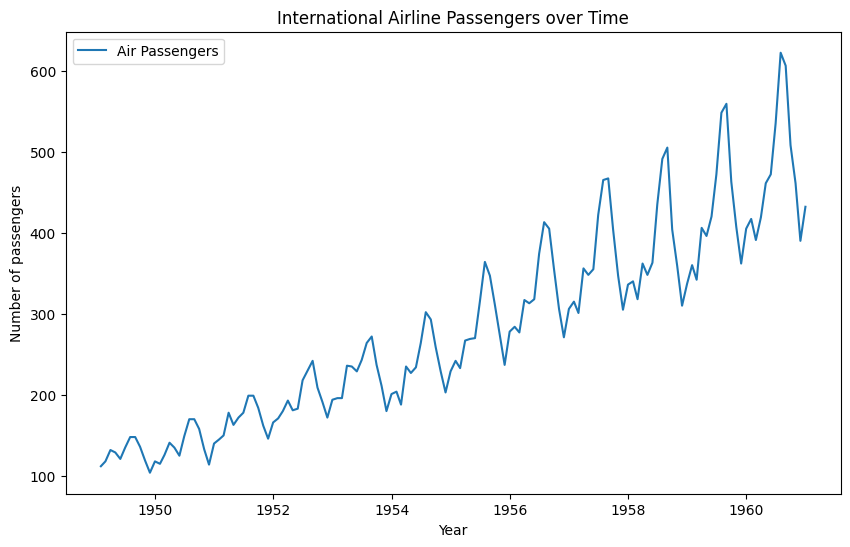

In [27]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['value'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('International Airline Passengers over Time')
plt.legend()
plt.show()



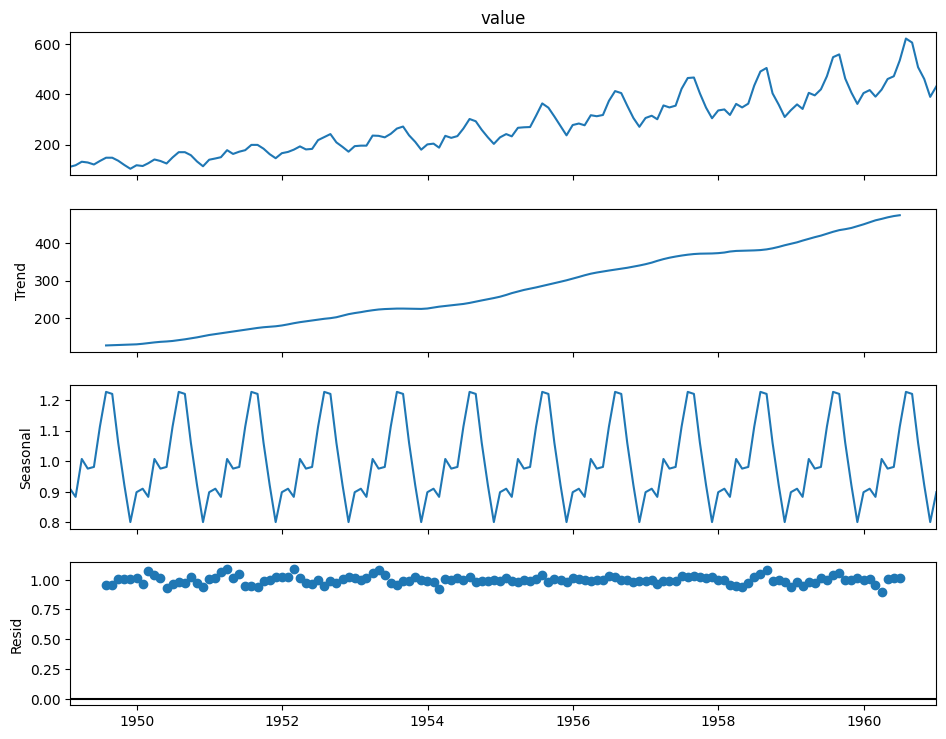

In [28]:
# 'time' 열을 인덱스로 설정하여 시계열 데이터 생성
ts = data.set_index('time')['value']

# 시계열 데이터의 추세, 순환, 계절성 분해
# "residual" (잔차) : 원본 시계열 데이터에서 추세(trend)와 계절성(seasonality) 성분을 제거한 후 남는 부분
result = sm.tsa.seasonal_decompose(ts, model='multiplicative')

# 결과 시각화
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


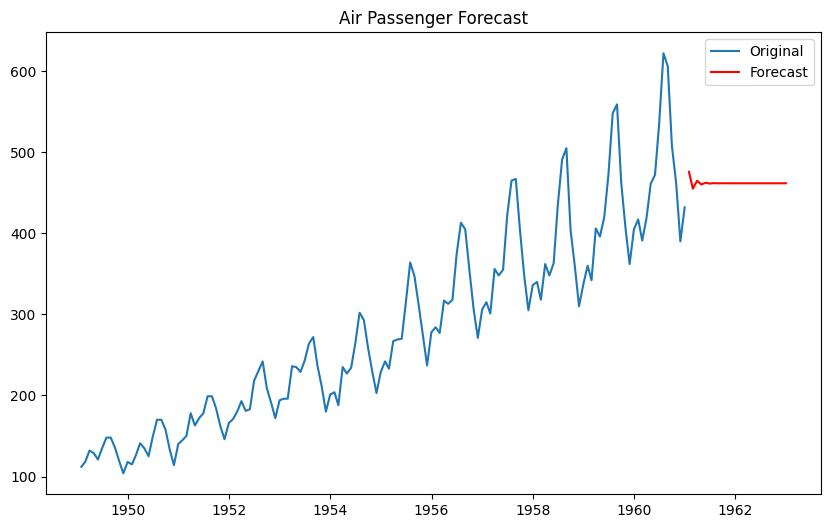

In [30]:
# ARIMA 모델 설정:
# 데이터의 과거 값, 차분을 통한 추세 변화, 그리고 예측 오차의 패턴을 모두 고려하여 미래 값을 예측
# 모델 파라미터 (p=1, d=1, q=1)
   # p: 자기 회귀(AR)의 차수, d: 차분(I)의 차수, q: 이동 평균(MA)의 차수
model = ARIMA(ts, order=(1, 1, 1))

# 모델 학습
model_fit = model.fit()

# 미래 승객 수 예측: 다음 24개월(2년) 동안의 데이터를 예측
forecast = model_fit.forecast(steps=24)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Air Passenger Forecast')
plt.show()